## 📆 Week in Charts - 04/05/2022

### Imports and stylesheets

In [5]:
# Import matplotlib, fonts and stylesheet (optional)

import os
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

font_path = "../../assets/fonts"

for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except Exception:
                continue

plt.style.use("../../assets/mpl_styles/tukan_style.mplstyle")

In [6]:
from tukan_mkt.helpers import get_tukan_api_request
import pandas as pd
from highlight_text import ax_text, fig_text
from dateutil.relativedelta import relativedelta
from PIL import Image
import urllib
import matplotlib.patheffects as path_effects


### Chart 1. Vehicle Sales Growth

In [7]:
payload = {
    "term": "year",
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "car_brand"
    ],
    "categories": {
        "car_brand": "all"
    },
    "request": [
        {
            "table": "mex_inegi_raiavl_sales",
            "variables": [
                "2c322893bde2346"
            ]
        }
    ],
    "from": "2000-01-04"
}

df = get_tukan_api_request(payload=payload)["data"]

Success getting the data


In [8]:
df = df[df["car_brand"].isin(["Ford", "General Motors", "Nissan", "Volkswagen", "Honda", "Toyota"])]
df = df[df["date"] < "2022-01-01"]

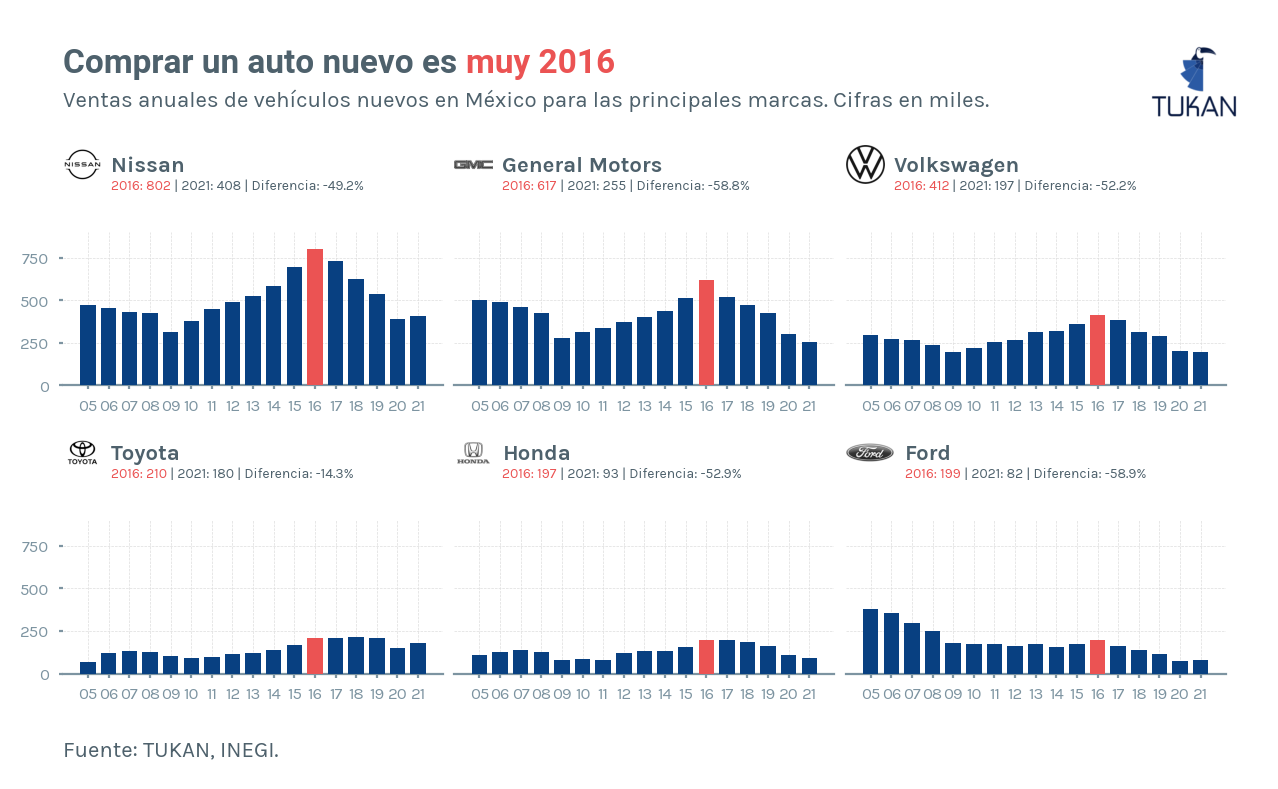

In [9]:
fig = plt.figure(dpi = 200, figsize = (7.5, 3.5))
gspec = gridspec.GridSpec(
    ncols = 3, nrows = 4, figure = fig, height_ratios = [(1/4)*2 if x % 2 != 0 else (1/4)/2 for x in range(4)], hspace = 0.5, wspace = 0.03
)

def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=.75, foreground="black")

max_y = df["2c322893bde2346"].max()/1000

brands = ["Nissan", "General Motors", "Volkswagen", "Toyota", "Honda", "Ford"]
logos = ["61487a41d329bb0004dbd326", "580b57fcd9996e24bc43c47f", "61321f3b00feb70004beb7bc", "61291551319275000479abf2", "580b57fcd9996e24bc43c484", "580b585b2edbce24c47b2c67"]

aux_counter = 0
aux_counter_2 = 0
for row in range(4):
    for col in range(3):
        if row % 2 != 0:

            ax = plt.subplot(
                gspec[row, col]
            )

            ax.set_ylim(0, max_y + 100)


            aux_df = df[df["car_brand"] == brands[aux_counter]].copy()

            ax.bar(range(2005,2022), aux_df["2c322893bde2346"]/1000, zorder = 3, width = 0.75)

            # -- Highlight 2016
            ax.patches[11].set_facecolor('#EB5353')

            ax.xaxis.set_ticks([x for x in range(2005,2022)])
            x_labels_ = ax.xaxis.set_ticklabels([f"{x:02d}" for x in range(5,22)])

            ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
            ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

            if col != 0:
                ax.yaxis.set_ticklabels([])
                ax.yaxis.set_tick_params(length = 0)
            else:
                ax.yaxis.set_tick_params(length = 1.5, labelsize = 6)
            
            ax.xaxis.set_tick_params(length = 1.5, labelsize = 6)

            ax.grid(lw = 0.25)

            aux_counter += 1
        
        else:

            brand = brands[aux_counter_2]
            x_16 = df[(df["car_brand"] == brands[aux_counter_2]) & (df["date"] == "2016-01-01")]["2c322893bde2346"].iloc[0]/1000
            x_21 = df[(df["car_brand"] == brands[aux_counter_2]) & (df["date"] == "2021-01-01")]["2c322893bde2346"].iloc[0]/1000


            logo_ax = plt.subplot(
                gspec[row, col],
                anchor = "NW"
            )
            req = urllib.request.Request(f'http://assets.stickpng.com/thumbs/{logos[aux_counter_2]}.png')
            req.add_header('User-agent', 'Mozilla/5.0 (Windows; U; Windows NT 5.1; de; rv:1.9.1.5) Gecko/20091102 Firefox/3.5.5')
            brand_icon = Image.open(urllib.request.urlopen(req)).convert("LA")
            logo_ax.imshow(brand_icon)
            logo_ax.axis("off")

            ax_text(
                x = 1.25, y = 0.72,
                s = f"{brand}",
                ax = logo_ax, weight = "bold", font = "Karla", ha = "left", size = 8, annotationbbox_kw={"xycoords":"axes fraction"}
            )

            ax_text(
                x = 1.25, y = 0.12,
                s = f"<2016: {x_16:,.0f}> | 2021: {x_21:,.0f} | Diferencia: {x_21/x_16 - 1:.1%}",
                highlight_textprops=[{"color":"#EB5353"}],
                ax = logo_ax, weight = "normal", font = "Karla", ha = "left", size = 5, annotationbbox_kw={"xycoords":"axes fraction"}
            )

            aux_counter_2 += 1


# ----- Title and subtitle

fig_text(x = 0.125, y = 1.02, 
         s = "Comprar un auto nuevo es <muy 2016>",
         highlight_textprops=[{"color":"#EB5353"}],
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Ventas anuales de vehículos nuevos en México para las principales marcas. Cifras en miles.",
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.79, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .03, 
         s = "Fuente: TUKAN, INEGI.",
         family = "Karla",
         fontsize = 8)


plt.savefig(
   "plots/ventas_vehiculos_05042022.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/ventas_vehiculos_05042022_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Chart 2. Transacciones en Cajeros Automáticos

In [68]:
dates = ["2022-01-01"]
data = pd.DataFrame()
for d in dates:
    payload = {
        "type": "data_table",
        "operation": "sum",
        "language": "es",
        "group_by": [
            "geography",
            "institutions"
        ],
        "categories": {
            "geography": [
                "b815762a2c6a283"
            ],
            "institutions": "all"
        },
        "request": [
            {
                "table": "mex_cnbv_cb_operational",
                "variables": [
                    "ad1841c2825df92",
                    "6ce544361c47af9"
                ]
            }
        ],
        "from": d,
        "to": d
    }

    df_ori = get_tukan_api_request(payload=payload)["data"]
    data = pd.concat([data,df_ori])

Success getting the data


In [69]:
data["trans"] = data["6ce544361c47af9"]/data["ad1841c2825df92"]
data = data.sort_values(by = "trans", ascending=True)
data.dropna(inplace = True)
data = data.tail(10)

In [70]:
data

,date,geography__ref,geography,institutions__ref,institutions,6ce544361c47af9,ad1841c2825df92,trans
8,2022-01-01,b815762a2c6a283,México,3c983392fcd35b9,Scotiabank Inverlat,3826120.0,1809.0,2115.046987
9,2022-01-01,b815762a2c6a283,México,47eb578e3bafd16,HSBC México,13599001.0,6102.0,2228.613733
14,2022-01-01,b815762a2c6a283,México,75c12fa4df9cd5b,Santander México,22994926.0,9511.0,2417.719062
16,2022-01-01,b815762a2c6a283,México,7fc20c4b6b7af8a,Banco del Bajío,1850773.0,719.0,2574.093185
0,2022-01-01,b815762a2c6a283,México,02ab4b407c039ca,Banorte,25246182.0,9714.0,2598.948116
20,2022-01-01,b815762a2c6a283,México,aac4b448da912c3,Banamex,26993830.0,8993.0,3001.649060
24,2022-01-01,b815762a2c6a283,México,ffb5a255e0d56e5,Regional,727717.0,215.0,3384.730233
4,2022-01-01,b815762a2c6a283,México,0ba100f70c128de,Banco Azteca,7589188.0,1949.0,3893.888148
21,2022-01-01,b815762a2c6a283,México,ae882fe094ece03,BBVA Bancomer,53938706.0,13435.0,4014.790175
2,2022-01-01,b815762a2c6a283,México,06d60d5f89f9570,BanCoppel,7925963.0,1838.0,4312.275843


In [71]:
data.replace({"institutions":{"BBVA Bancomer":"BBVA México", "Regional": "Banregio", "Banamex":"Citibanamex"}}, inplace = True)

In [72]:
data

,date,geography__ref,geography,institutions__ref,institutions,6ce544361c47af9,ad1841c2825df92,trans
8,2022-01-01,b815762a2c6a283,México,3c983392fcd35b9,Scotiabank Inverlat,3826120.0,1809.0,2115.046987
9,2022-01-01,b815762a2c6a283,México,47eb578e3bafd16,HSBC México,13599001.0,6102.0,2228.613733
14,2022-01-01,b815762a2c6a283,México,75c12fa4df9cd5b,Santander México,22994926.0,9511.0,2417.719062
16,2022-01-01,b815762a2c6a283,México,7fc20c4b6b7af8a,Banco del Bajío,1850773.0,719.0,2574.093185
0,2022-01-01,b815762a2c6a283,México,02ab4b407c039ca,Banorte,25246182.0,9714.0,2598.948116
20,2022-01-01,b815762a2c6a283,México,aac4b448da912c3,Citibanamex,26993830.0,8993.0,3001.649060
24,2022-01-01,b815762a2c6a283,México,ffb5a255e0d56e5,Banregio,727717.0,215.0,3384.730233
4,2022-01-01,b815762a2c6a283,México,0ba100f70c128de,Banco Azteca,7589188.0,1949.0,3893.888148
21,2022-01-01,b815762a2c6a283,México,ae882fe094ece03,BBVA México,53938706.0,13435.0,4014.790175
2,2022-01-01,b815762a2c6a283,México,06d60d5f89f9570,BanCoppel,7925963.0,1838.0,4312.275843


In [66]:
3893.888148/31

125.60929509677419

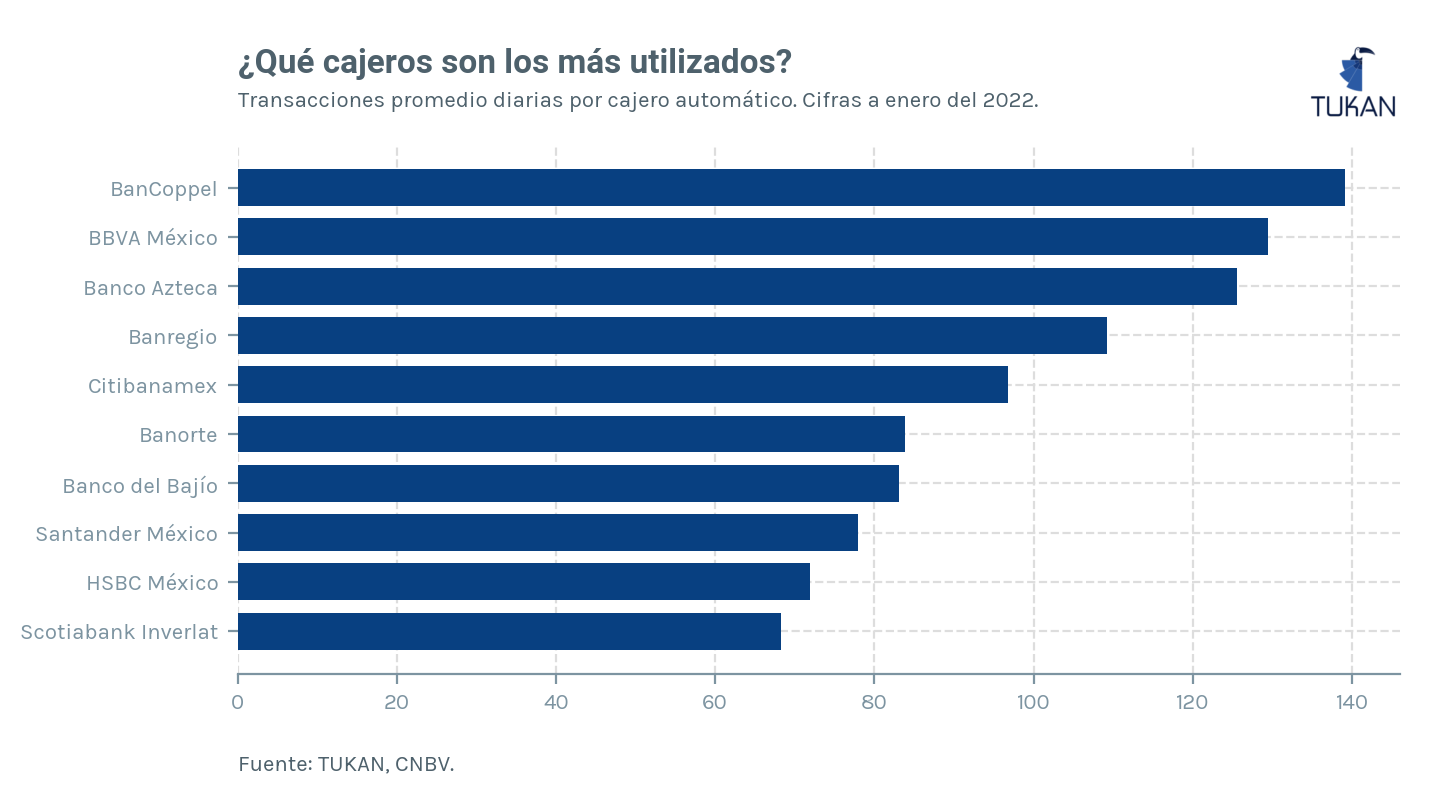

In [73]:
fig = plt.figure(dpi = 200, figsize = (7.5, 3.5))
ax = plt.subplot(111)


ax.barh(data["institutions"], data["trans"]/31, zorder = 3, height = .75)

fig_text(x = 0.125, y = 1.02, 
         s = "¿Qué cajeros son los más utilizados?",
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Transacciones promedio diarias por cajero automático. Cifras a enero del 2022.",
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.78, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, CNBV.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/atm_05042022.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/atm_05042022_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Chart 3. Movie Theaters

In [15]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "economic_activity"
    ],
    "categories": {
        "economic_activity": [
            "8cdf2c91314ecd6"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_ems",
            "variables": [
                "560fe2a60684221"
            ]
        }
    ],
    "from": "2010-01-04"
}

df = get_tukan_api_request(payload)["data"]

Success getting the data


In [16]:
from datetime import datetime

In [17]:
df.sort_values(by = "560fe2a60684221")

,date,economic_activity__ref,economic_activity,560fe2a60684221
123,2020-04-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,3.409770
124,2020-05-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,9.302902
126,2020-07-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,10.963441
125,2020-06-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,14.729090
127,2020-08-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,26.351103
...,...,...,...,...
87,2017-04-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,400.637633
100,2018-05-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,402.568296
113,2019-06-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,403.182362
78,2016-07-01,8cdf2c91314ecd6,Exhibición de películas y otros materiales aud...,420.780528


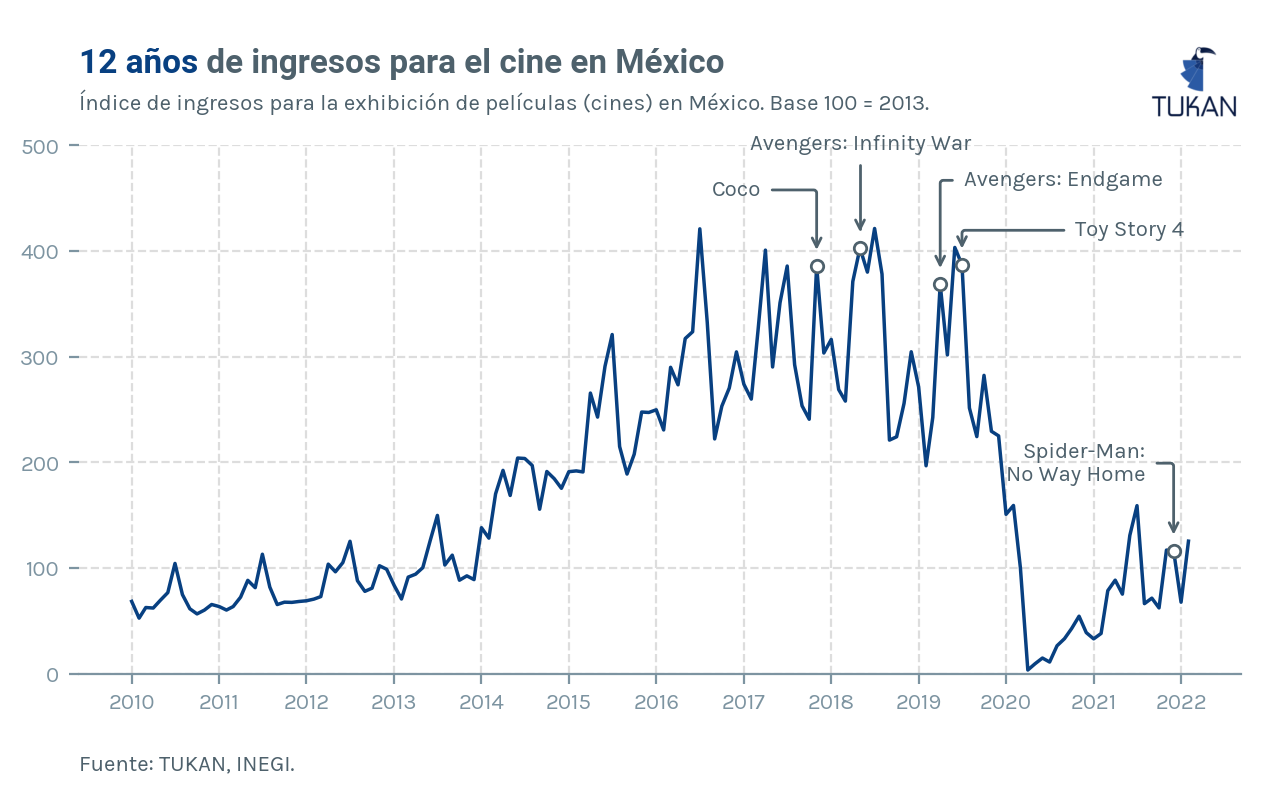

In [64]:
fig = plt.figure(dpi = 200, figsize = (7.5, 3.5))
ax = plt.subplot(111)

# --- Get minimum and maximum axis positions.

X_min = df["date"].min()
X_max = df["date"].max()

ax.set_ylim(0,500)

ax.plot(df["date"], df["560fe2a60684221"])

ax.scatter([datetime(2021,12,1)], [df[df["date"] == "2021-12-01"]["560fe2a60684221"].iloc[0]], s = 20, ec = "#4E616C", fc ="white", zorder = 3)
ax.scatter([datetime(2019,4,1)], [df[df["date"] == "2019-04-01"]["560fe2a60684221"].iloc[0]], s = 20, ec = "#4E616C", fc ="white", zorder = 3)
ax.scatter([datetime(2018,5,1)], [df[df["date"] == "2018-05-01"]["560fe2a60684221"].iloc[0]], s = 20, ec = "#4E616C", fc ="white", zorder = 3)
ax.scatter([datetime(2017,11,1)], [df[df["date"] == "2017-11-01"]["560fe2a60684221"].iloc[0]], s = 20, ec = "#4E616C", fc ="white", zorder = 3)
ax.scatter([datetime(2019,7,1)], [df[df["date"] == "2019-07-01"]["560fe2a60684221"].iloc[0]], s = 20, ec = "#4E616C", fc ="white", zorder = 3)

ax.xaxis.set_major_locator(mdates.YearLocator(1))

movies = ["Toy Story 4", "Coco", "Avengers: Infinity War", "Avengers: Endgame", "Spider-Man:\nNo Way Home"]
dates = [
    datetime(2021,12,1),
    datetime(2019,4,1),
    datetime(2018,5,1),
    datetime(2017,11,1),
    datetime(2019,7,1)
]
x_off = [80,-20,40,80,-10]
y_off = [5,20,30,30,20]

dates.reverse()

i = 0
for m, date in zip(movies, dates):
    if x_off[i] > 0:
        angleA = 0
        angleB = 90
    else:
        angleA = 0
        angleB = 90
    ax.annotate(
    text = f"{m}",
    xy = (date, df[df["date"] == date]["560fe2a60684221"].iloc[0] + 10),
    xytext = (x_off[i],y_off[i]),
    textcoords="offset points",
    size = 8,
    va="bottom",
    ha="right",
    family = "Karla",
    arrowprops=dict(
            arrowstyle="->", ec="#4E616C", connectionstyle=f"angle,angleA={angleA},angleB={angleB},rad=3"
    )
    )

    i+=1


fig_text(x = 0.125, y = 1.02, 
         s = "<12 años> de ingresos para el cine en México",
         highlight_textprops=[{"color": "#084081"}],
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Índice de ingresos para la exhibición de películas (cines) en México. Base 100 = 2013.",
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.78, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, INEGI.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/movies_05042022.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/movies_05042022_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)